# Flight Data Analysis

In [2]:
# importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

In [15]:
df2000 = pd.read_csv('2000.csv')
df2001 = pd.read_csv('2001.csv',encoding='latin-1')
df2000

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2000,1,28,5,1647.0,1647,1906.0,1859,HP,154,...,15,11,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2000,1,29,6,1648.0,1647,1939.0,1859,HP,154,...,5,47,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2000,1,30,7,NaN,1647,NaN,1859,HP,154,...,0,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2000,1,31,1,1645.0,1647,1852.0,1859,HP,154,...,7,14,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2000,1,1,6,842.0,846,1057.0,1101,HP,609,...,3,8,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5683042,2000,12,9,6,615.0,613,941.0,945,AA,705,...,11,18,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5683043,2000,12,10,7,619.0,613,925.0,945,AA,705,...,8,15,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5683044,2000,12,11,1,611.0,613,949.0,945,AA,705,...,8,12,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5683045,2000,12,12,2,613.0,613,1005.0,945,AA,705,...,9,18,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [45]:
# This helps us to view the names of all the columns present in the 2000 data which cannot be seen clearly above
df2000.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'Diverted'],
      dtype='object')

In [16]:
# This gives us an idea of all the present na values in the 2000 dataset
df2000.isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               187490
CRSDepTime                 0
ArrTime               201744
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                    0
ActualElapsedTime     201744
CRSElapsedTime           269
AirTime               201744
ArrDelay              201744
DepDelay              187490
Origin                     0
Dest                       0
Distance                   0
TaxiIn                     0
TaxiOut                    0
Cancelled                  0
CancellationCode     5683047
Diverted                   0
CarrierDelay         5683047
WeatherDelay         5683047
NASDelay             5683047
SecurityDelay        5683047
LateAircraftDelay    5683047
dtype: int64

In [ ]:
df2001.isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               231198
CRSDepTime                 0
ArrTime               244107
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                    0
ActualElapsedTime     244107
CRSElapsedTime             0
AirTime               244107
ArrDelay              244107
DepDelay              231198
Origin                     0
Dest                       0
Distance                   0
TaxiIn                     0
TaxiOut                    0
Cancelled                  0
CancellationCode     5967780
Diverted                   0
CarrierDelay         5967780
WeatherDelay         5967780
NASDelay             5967780
SecurityDelay        5967780
LateAircraftDelay    5967780
dtype: int64

We can see that in both dataframe, some columns are completely missing and we need to remove all those columns. 

```
# This is formatted as code
```



In [17]:
df2000 = df2000.drop(['CancellationCode', 'CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'], axis = 1)
df2001 = df2001.drop(['CancellationCode', 'CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'], axis = 1)

Now the rows with nan values will be removed to make data more cleaned. Alternatively we can also replace it with mean. As the number of nan value are very low so the better option is to drop it. 




In [18]:
Dfdf2000Clean = df2000.dropna()
Df2001Clean = df2001.dropna()
print("The length of 2000 data is !=",len(Dfdf2000Clean))
print("The length of 2001 data is !=", len(Df2001Clean))

The length of 2000 data is != 5481303
The length of 2001 data is != 5723673


In [19]:
DfCombine = pd.concat([Dfdf2000Clean, Df2001Clean])

In [20]:
DfCombine

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,2000,1,28,5,1647.0,1647,1906.0,1859,HP,154,...,233.0,7.0,0.0,ATL,PHX,1587,15,11,0,0
1,2000,1,29,6,1648.0,1647,1939.0,1859,HP,154,...,239.0,40.0,1.0,ATL,PHX,1587,5,47,0,0
3,2000,1,31,1,1645.0,1647,1852.0,1859,HP,154,...,226.0,-7.0,-2.0,ATL,PHX,1587,7,14,0,0
4,2000,1,1,6,842.0,846,1057.0,1101,HP,609,...,244.0,-4.0,-4.0,ATL,PHX,1587,3,8,0,0
5,2000,1,2,7,849.0,846,1148.0,1101,HP,609,...,267.0,47.0,3.0,ATL,PHX,1587,8,24,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5967775,2001,12,14,5,704.0,700,1159.0,1155,DL,678,...,148.0,4.0,4.0,ONT,DFW,1189,14,13,0,0
5967776,2001,12,15,6,708.0,700,1158.0,1155,DL,678,...,143.0,3.0,8.0,ONT,DFW,1189,9,18,0,0
5967777,2001,12,16,7,656.0,700,1147.0,1155,DL,678,...,153.0,-8.0,-4.0,ONT,DFW,1189,7,11,0,0
5967778,2001,12,17,1,656.0,700,1151.0,1155,DL,678,...,151.0,-4.0,-4.0,ONT,DFW,1189,13,11,0,0


## 1 Best time of day, month, year to fly to avoid or minimize delays 


In [12]:
# Filter the dataframe where the delay is less than 1 minute is considered on time.
dataArr = DfCombine[DfCombine['ArrDelay']<1]
dataDep = DfCombine[DfCombine['DepDelay']<1]

#### Best Time of the day

In [13]:
# Define the function
def round_to_nearest_hundred_with_threshold(value, threshold):
    # Step 2
    rounded_value = round(value / 100)

    # Step 4
    rounded_value *= 100

    # Step 5
    if abs(value - rounded_value) <= threshold:
        new_value = rounded_value
    else:
        new_value = rounded_value + 100

    return new_value


In [14]:
dataArr_copy = dataArr.copy()

dataArr_copy.loc[:, 'ArrTime'] = dataArr_copy['ArrTime'].apply(lambda x: round_to_nearest_hundred_with_threshold(x, 30))

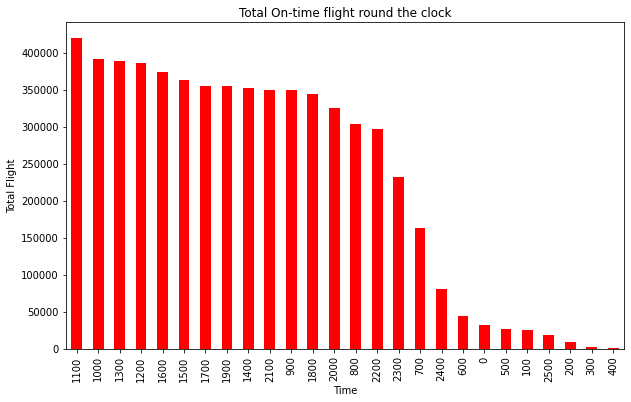

In [ ]:
plt.figure(figsize = (10,6))
dataArr_copy['ArrTime'].value_counts().plot(kind = 'bar', color = 'r')
plt.title("Total On-time flight round the clock")
plt.xlabel("Time")
plt.ylabel("Total Flight")
plt.show()

This figure shows that morning and noon time is better to minimize delay

### Best time of year

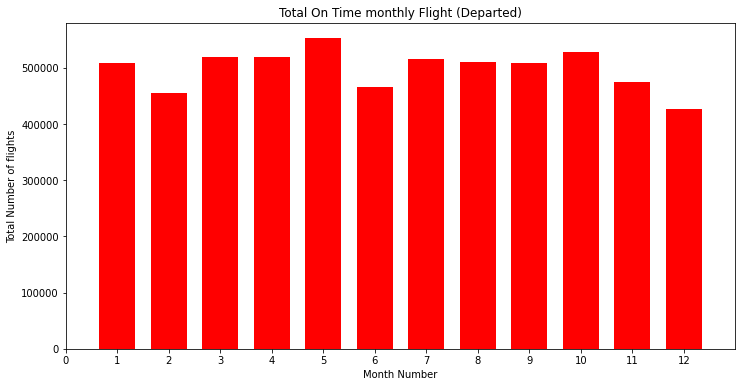

In [ ]:
plt.figure(figsize= (12,6))
bins = np.arange(14) - 0.5
plt.hist(dataArr['Month'], bins, rwidth = 0.7, color = 'r')
plt.xticks(range(13))
plt.title("Total On Time monthly Flight (Departed)")
plt.xlabel("Month Number")
plt.ylabel("Total Number of flights")
plt.xlim([0, 13])
plt.show()

The best month of the year is march, april and May where the flight is less liekly to be delayed as compare to other months of the year.

### Best time of the week

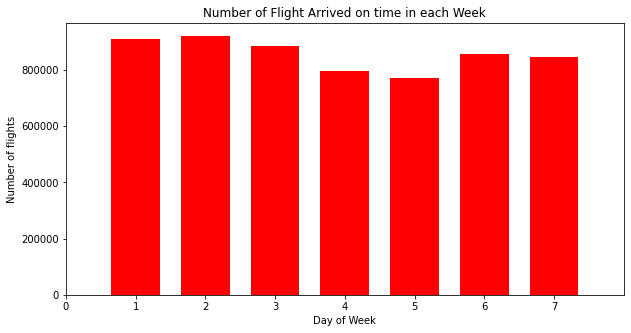

In [ ]:
plt.figure(figsize= (10,5))
bins = np.arange(9) - 0.5
plt.hist(dataArr['DayOfWeek'], bins, rwidth = 0.7, color = 'r')
plt.xticks(range(8))
plt.title("Number of Flight Arrived on time in each Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of flights")
plt.xlim([0, 8])
plt.show()

Above figure shows that the best day of the week is day 1 (Sunday) or 2 (Monday) where mostly flights arrived on time. 

### Best time of the month

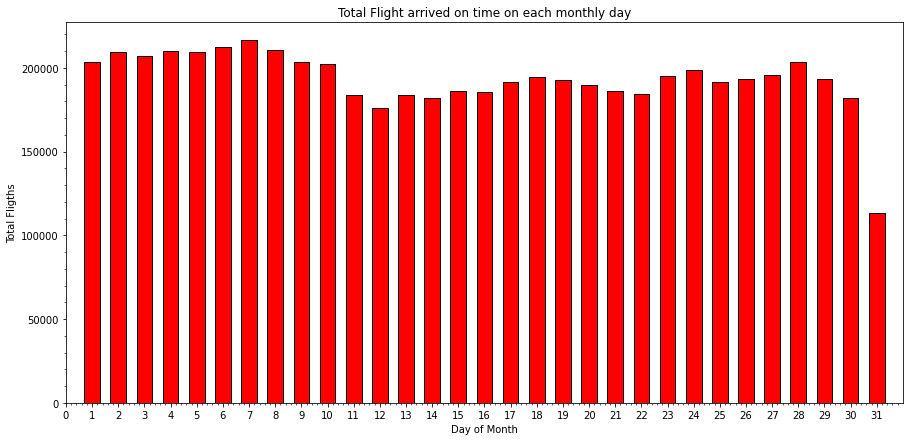

In [ ]:
plt.figure(figsize= (15,7))
bins = np.arange(33) - 0.5
plt.hist(dataArr['DayofMonth'], bins, rwidth = 0.6, color = 'r', edgecolor = 'black')
plt.xticks(range(32))
plt.title("Total Flight arrived on time on each monthly day")
plt.xlabel("Day of Month")
plt.ylabel("Total Fligths")
plt.xlim([0, 32])
plt.minorticks_on()
plt.show()

Above figure shows that the best day of the month is start and the end of the month. As we can see that the number of flight arrived on time in the middle of the month is less as compare to the start and end of the month.

## 2. Do older planes suffer more delays?

In [7]:
Plane_data = pd.read_csv('plane-data.csv')
Plane_data.head(5)

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N051AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N052AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N054AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N055AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
Plane_data.columns

Index(['tailnum', 'type', 'manufacturer', 'issue_date', 'model', 'status',
       'aircraft_type', 'engine_type', 'year'],
      dtype='object')

In [23]:
# Remove rows with missing values from plane_data
Plane_data.dropna(inplace=True)

# Join df_combine with plane_data on tailnum
selected_cols = ["tailnum", "type", "manufacturer", "issue_date", "model", "status", "aircraft_type", "engine_type", "year"]
plane_data_select = Plane_data[selected_cols]

# Rename tailnum in plane_data to match TailNum in flights_clean
plane_data_select.rename(columns={"tailnum": "TailNum"}, inplace=True)

In [41]:
# Left join DfCombine and plane_data_select by TailNum
combined_data = pd.merge(DfCombine, plane_data_select, on="TailNum", how="left")
combined_data


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Cancelled,Diverted,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,2000,1,28,5,1647.0,1647,1906.0,1859,HP,154,...,0,0,Corporation,AIRBUS INDUSTRIE,10/28/2004,A319-132,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999
1,2000,1,29,6,1648.0,1647,1939.0,1859,HP,154,...,0,0,Corporation,AIRBUS INDUSTRIE,06/04/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999
2,2000,1,31,1,1645.0,1647,1852.0,1859,HP,154,...,0,0,Corporation,AIRBUS INDUSTRIE,10/21/2004,A319-132,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999
3,2000,1,1,6,842.0,846,1057.0,1101,HP,609,...,0,0,Corporation,BOEING,08/25/1999,737-3G7,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1987
4,2000,1,2,7,849.0,846,1148.0,1101,HP,609,...,0,0,Corporation,AIRBUS INDUSTRIE,06/30/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11204971,2001,12,14,5,704.0,700,1159.0,1155,DL,678,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11204972,2001,12,15,6,708.0,700,1158.0,1155,DL,678,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11204973,2001,12,16,7,656.0,700,1147.0,1155,DL,678,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11204974,2001,12,17,1,656.0,700,1151.0,1155,DL,678,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# Calculate delay time for each flight
combined_data["DepDelay"] = combined_data["DepTime"] - combined_data["CRSDepTime"]
combined_data["ArrDelay"] = combined_data["ArrTime"] - combined_data["CRSArrTime"]

# Determine average delay time by aircraft type
avg_delay_by_year = combined_data.groupby("year")["ArrDelay"].mean().reset_index()
avg_delay_by_year.dropna(inplace=True)
avg_delay_by_year.head()

,year,ArrDelay
0,1956,-18.257282
1,1959,-22.864172
2,1962,-18.641735
3,1963,-10.266538
4,1964,-33.765354


In [43]:
# Replace non-numeric values in the year column with NaN values
combined_data["year"].replace("None", np.nan, inplace=True)

# Calculate the median value of the year column
year_median = combined_data["year"].median()

# Replace missing values in the year column with the median value
combined_data["year"].fillna(year_median, inplace=True)

# Convert the year column to integer type
combined_data["year"] = combined_data["year"].astype(int)

# Calculate the age of the plane by subtracting the year of manufacture from the current year (2023)
combined_data["age"] = 2023 - combined_data["year"]
combined_data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Diverted,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year,age
0,2000,1,28,5,1647.0,1647,1906.0,1859,HP,154,...,0,Corporation,AIRBUS INDUSTRIE,10/28/2004,A319-132,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999,24
1,2000,1,29,6,1648.0,1647,1939.0,1859,HP,154,...,0,Corporation,AIRBUS INDUSTRIE,06/04/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999,24
2,2000,1,31,1,1645.0,1647,1852.0,1859,HP,154,...,0,Corporation,AIRBUS INDUSTRIE,10/21/2004,A319-132,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999,24
3,2000,1,1,6,842.0,846,1057.0,1101,HP,609,...,0,Corporation,BOEING,08/25/1999,737-3G7,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1987,36
4,2000,1,2,7,849.0,846,1148.0,1101,HP,609,...,0,Corporation,AIRBUS INDUSTRIE,06/30/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999,24


In [48]:
# Group the data by age and calculate the average delay time
delay_by_age = combined_data.groupby("age")["ArrDelay"].mean().reset_index()

# Create a new column to indicate whether a flight is delayed or not
combined_data["is_delayed"] = np.where(combined_data["ArrDelay"] > 0, 1, 0)

# Group the data by year and calculate the proportion of delayed flights
delay_prop_by_year = combined_data.groupby("year")["is_delayed"].mean().reset_index()
delay_prop_by_year.dropna(inplace=True)
delay_prop_by_year.head()

,year,is_delayed
0,1956,0.490291
1,1959,0.440830
2,1962,0.451758
3,1963,0.459216
4,1964,0.425984


In [49]:
# Filter out rows with year values of 2002 and 2007, and NaN
delay_prop_by_year = delay_prop_by_year.dropna(subset=['year'])
delay_prop_by_year = delay_prop_by_year[~delay_prop_by_year['year'].isin([2002, 2007])]
delay_prop_by_year.head()

,year,is_delayed
0,1956,0.490291
1,1959,0.440830
2,1962,0.451758
3,1963,0.459216
4,1964,0.425984


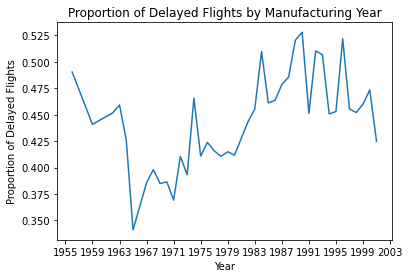

In [50]:
# Create a line plot with x-axis interval of 5 years
plt.plot(delay_prop_by_year["year"], delay_prop_by_year["is_delayed"])
plt.xticks(np.arange(1955, 2005, step=4))
plt.xlabel("Year")
plt.ylabel("Proportion of Delayed Flights")
plt.title("Proportion of Delayed Flights by Manufacturing Year")
plt.show()

Based of the graph, this shows that flights delays are not affected by the age of the plane alone and may have several other factors that may influence this delay. 

## 3. How does the number of people flying between different locations change over time?

For this, we have to check which are the most repeated destination and origin over the time and how it changes from 2000 to 2001. 

In [ ]:
Dfdf2000Clean['Origin'].value_counts()[:15].index.tolist() 

['ORD',
 'ATL',
 'DFW',
 'LAX',
 'PHX',
 'STL',
 'DTW',
 'MSP',
 'LAS',
 'DEN',
 'IAH',
 'SFO',
 'CLT',
 'EWR',
 'PHL']

In [ ]:
Df2001Clean['Origin'].value_counts()[:15].index.tolist() 

['ORD',
 'DFW',
 'ATL',
 'LAX',
 'PHX',
 'STL',
 'DTW',
 'MSP',
 'LAS',
 'DEN',
 'IAH',
 'CLT',
 'BOS',
 'SFO',
 'EWR']

Above are the top 10 most repeated origin in ascending order for 2000 and 2001. It is clear from the above results, that ORD is the most repeated origin in both 2000 and 2001. But at spot 2 in 2000, we have "ATL" as the most repeated while in 2001, it is been taken over by "DFW". It illustrates that in 2001, "DFW" become most popular than "ATL". Such changes can be seen in later airport as well. 

In [ ]:
Dfdf2000Clean['Dest'].value_counts()[:15].index.tolist() 

['ORD',
 'ATL',
 'DFW',
 'LAX',
 'PHX',
 'STL',
 'DTW',
 'MSP',
 'LAS',
 'DEN',
 'IAH',
 'SFO',
 'CLT',
 'EWR',
 'PHL']

In [ ]:
Df2001Clean['Dest'].value_counts()[:15].index.tolist() 

['ORD',
 'DFW',
 'ATL',
 'LAX',
 'PHX',
 'STL',
 'DTW',
 'MSP',
 'LAS',
 'DEN',
 'IAH',
 'CLT',
 'BOS',
 'SFO',
 'EWR']

Above results are the most repeated destination for both year. In tha similar way as origin, the 'DFW" has taken over "ATL" as most popular destination as well. 

## 4. Can you detect cascading failures as delays in one airport create delays in others?

For this project, we will chose year 2000 and the relationship between departure delay (first airport) will be checked with the relationship with arrival delay (second airport).

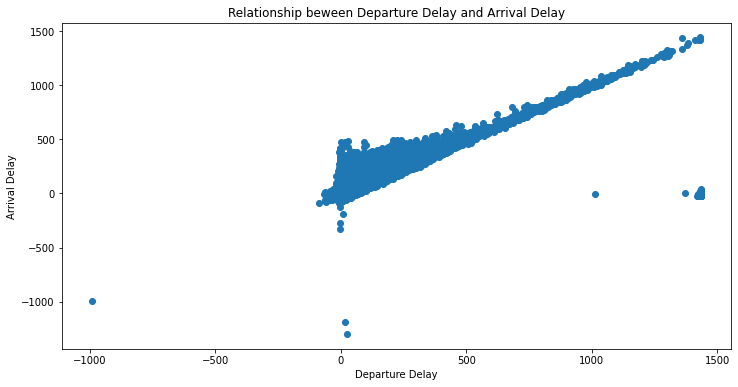

In [ ]:
plt.figure(figsize = (12,6))
plt.scatter(Dfdf2000Clean['DepDelay'], Dfdf2000Clean['ArrDelay'])
plt.title("Relationship beween Departure Delay and Arrival Delay")
plt.xlabel("Departure Delay")
plt.ylabel("Arrival Delay")
plt.show()

This clearly shows that the there is a positive direct relationship between departure delay and arrival delay. It also illustrates that delay at one airport due to multiple reason could cause delay in another aiport as well. 

## 5. Use the available variables to construct a model that predicts delays

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

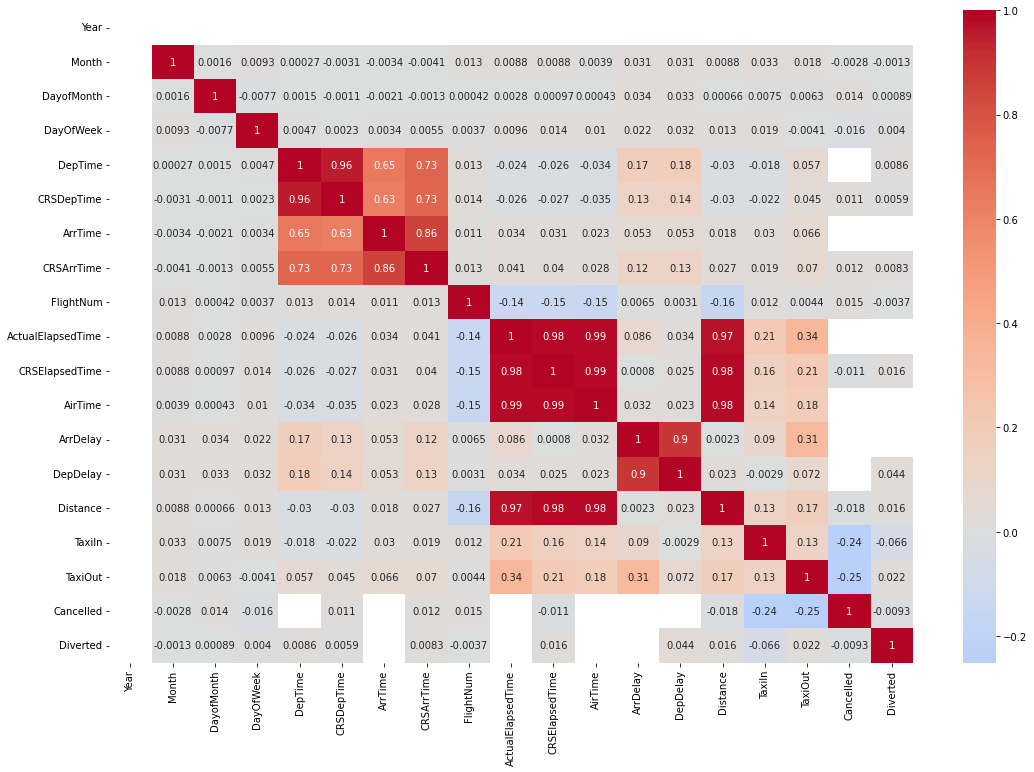

In [ ]:
corr = df2000.corr()
plt.figure(figsize = (18,12))
# Create a heatmap using seaborn
sns.heatmap(corr, cmap='coolwarm', center=0, annot=True)

# Show the plot
plt.show()

Based on above figure, we need to keep few attributes for model while remove all others that are either less important or not important.

In [ ]:
modelData = df2000[['TaxiOut','DepDelay', 'CRSArrTime','DepTime','CRSDepTime','ArrDelay']]

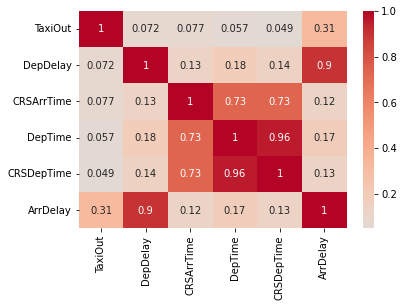

In [ ]:
modelData = modelData.dropna(axis=0, how='any')
corr = modelData.corr()

# Create a heatmap using seaborn
sns.heatmap(corr, cmap='coolwarm', center=0, annot=True)

# Show the plot
plt.show()

In [ ]:
# Extracting the predictive variables
X = modelData[['TaxiOut','DepDelay', 'CRSArrTime','DepTime','CRSDepTime']]

# Extracting only the prediction variable
y = modelData['ArrDelay']

In [ ]:
# Splitting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('The shape of training features is:', X_train.shape)
print('The shape of testing features is:', X_test.shape)


The shape of training features is: (4385042, 5)
The shape of testing features is: (1096261, 5)


In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test data
ypred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate mean squared error
mse = mean_squared_error(y_test, ypred)

# Calculate R-squared
r2 = r2_score(y_test, ypred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 160.39688524861938
R-squared: 0.8767932839354801


In [ ]:
# The predicted values is
ypred

array([100.19058934,  12.45964236,   4.08476475, ...,   2.61434552,
        92.75937611,  25.29934476])